# Ant Colony Optimization - Student task

**Credit:** Annalena Bebenroth, Kamran Vatankhah-Barazandeh, Marcel Banser, Johanna Linkemeyer, Reem Farah, Mortimer von Chappuis

### Context description:
You might have heard of the 9€ ticket that should be available in Germany from June until August. With this ticket, you are able to take regional trains and busses within Germany for 9€ per month. You're taking the chance and plan a city trip through Germany. Since you don't want to spend too much time in the trains to have more time in the cities, you want to optimize your traveling route. 

Specifically, you want to visit the following cities: 

**Osnabrück, Münster, Köln, München, Hamburg, Berlin, Hannover, Karlsruhe, Leipzig, Düsseldorf,Kassel, Cottbus, Bremen, Nürnberg, Saarbrücken**

For task simplicity, we assume that:
1. there are direct connections between all cities.
2. the distance between the cities is a valid indicator for the required travel time.

Of course, both assumptions might not be true in the real world.

### Task 1: The Ant System
In the presentation, you have seen how Ant System can be used to solve the TSP. We want you to implement this yourself to solve the task decribed above. We provide you with the basic code structure, which includes the classes ```Ant``` and ```AntColony```. You will have to add your implementation marked with *## add your code here*. We also provide brief descriptions of what should be implemented at those positions. For the relevant formulas, we would like to refer to the presentation slides regarding **Ant System**.

Our implementation further makes use of the classes ```View```, ```Node```, ```Edge```, ```Graph```, ```Germany```. You can view those as helper classes contained in the file ```graph.py```. You do not have to do anything in that file.

In [2]:
from itertools import count
from graph import *
from time import time
import random

### Task 1.1 Finish the Ant class
For the Ant class, there are three function that you need to implement: ```reset```, ```step```, and ```transitions```. In their docstrings, you can see what is supposed to happen in those functions.

Starting Node: ⟨4⟩

⟨4⟩
⟨4⟩
List of valid neighbors: 
[Node⟨coordinates:[235 234]⟩, Node⟨coordinates:[324 137]⟩, Node⟨coordinates:[312 226]⟩, Node⟨coordinates:[264 391]⟩, Node⟨coordinates:[478 215]⟩, Node⟨coordinates:[432 302]⟩, Node⟨coordinates:[175 310]⟩]

Edge: ⟨4⟩⟝⟨0⟩ Distances: 335.19695702676063
Edge: ⟨4⟩⟝⟨1⟩ Distances: 397.57389250301634
Edge: ⟨4⟩⟝⟨2⟩ Distances: 313.4645115479582
Edge: ⟨4⟩⟝⟨3⟩ Distances: 190.24457942343588
Edge: ⟨4⟩⟝⟨5⟩ Distances: 323.56297686849155
Edge: ⟨4⟩⟝⟨6⟩ Distances: 228.84929538890873
Edge: ⟨4⟩⟝⟨7⟩ Distances: 310.42712510346126

List of valid edges with distance: 
[Edge⟨4⟩⟝⟨0⟩ ⟨value:335.19695702676063, pheromone:0.30809703956281265⟩, Edge⟨4⟩⟝⟨1⟩ ⟨value:397.57389250301634, pheromone:0.30809703956281265⟩, Edge⟨4⟩⟝⟨2⟩ ⟨value:313.4645115479582, pheromone:0.30809703956281265⟩, Edge⟨4⟩⟝⟨3⟩ ⟨value:190.24457942343588, pheromone:0.30809703956281265⟩, Edge⟨4⟩⟝⟨5⟩ ⟨value:323.56297686849155, pheromone:0.30809703956281265⟩, Edge⟨4⟩⟝⟨6⟩ ⟨value:228.84929538890873, phe

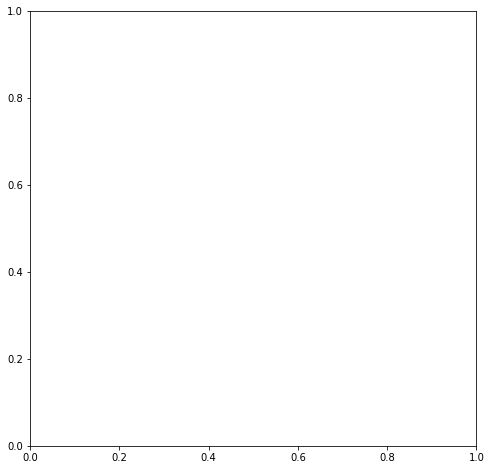

In [6]:
class Ant:
    def __init__(self, graph, neighbors, valid, alpha=1, beta=1, termination=lambda self: bool(self.nodes)):
        """
        An ant is supposed to travel within a graph, visiting all nodes exactly once.
        :param graph: graph in which the ant is traveling
        :param neighbors: function that returns the neighbours of the node the ant currently is on
        :param valid: True once an ant has finished its solution
        :param alpha: importance of pheromone quantity
        :param beta: importance of heuristic information
        :param termination:
        """
        self.graph = graph
        self.neighbors = lambda n: neighbors(self, n)
        self.valid = lambda: valid(self)
        self.alpha = alpha
        self.beta = beta
        self.termination = lambda: termination(self)
        self.reset()

    def __contains__(self, other):
        """
        Allows to test, whether the input is contained in either the nodes or edges within the current path.
        :param other: input can be an edge or node or another object
        :return: True if the input already is in the path (either as a node or edge), False otherwise
        """
        if isinstance(other, Node):
            return other in self.path_nodes
        elif isinstance(other, Edge):
            return other in self.path_edges
        else:
            return False

    def reset(self):
        """
        Resets the current 'status' of an ant, i.e. ant is initialized on a random node within the graph and has not
        travelled yet.
        """
        ## add your code here
        
        ## TASK: Implement the class variables self.travel_dist (int), self.node (Node), self.path_nodes (list), and 
        ## self.path_edges (list)
        
        self.travel_dist = 0 # set to 0 as no nodes have been visited yet
        self.node = self.graph[random.randint(0, len(self.graph)-1)] # choose a random node
        self.path_nodes = [self.node] # save node as having already been visited
        self.path_edges = [] # create empty list as no edges have been visited yet
        
#         print(self.travel_dist)
#         print(self.path_nodes)
#         print(self.path_edges)

        print("Starting Node: " + str(self.node) + "\n")

    def step(self):
        """
        Performs the next step of the ant, choosing the next node based on transition probabilities and adds the node
        and edges to the current path information.
        :return: True if a next step was performed, False otherwise
        """
        ## add your code here
        ## HINT: You have to use the transitions function to determine the next node that is to be visited
        
        # Greedily choose next node
        nodes, probabilities = self.transitions()
        max_value = max(probabilities)
        max_index = probabilities.index(max_value) 
        new_node = nodes[max_index]
          
        # Add new node and edges to current path
        self.path_nodes.append(new_node)
        self.path_edges.append(graph[self.node, new_node])
        
        # Update traveled distance
        self.travel_dist += graph[self.node, new_node].value     
        
        print("\nChosen new Node: " + str(new_node))
        print("New path nodes: " + str(self.path_nodes))
        print("New edge nodes: " + str(self.path_edges))
        print("New traveled distance nodes: " + str(self.travel_dist))
        
        pass

    def transitions(self):
        """
        Performs the calculations to receive information which nodes can be visited next with which probabilities.
        :return nodes, probabilities: return the nodes and their respective probabilities that the ant travels to next
        """
        ## add your code here
        ## HINT: You could need the function self.neighbours()
        
        # create lists for valid edges and neighbors
        valid_neighbors = []
        valid_edges = []
           
        # check if a node is a valid neighbor
        for n in self.node:           
            if self.neighbors(n):
                valid_neighbors.append(n)
        
        print("List of valid neighbors: \n" + str(valid_neighbors) + "\n")
        
        # create sums of attributes
        edge_value_sum = 0
        edge_pheromone_sum = 0
        
        # find edges corresponding to the valid neighbors and sum up their attributess
        for neighbor_node in valid_neighbors:
            
            edge_value = graph.edges.value[int(self.node),int(neighbor_node)]
            valid_edges.append(graph[self.node, neighbor_node])
            print("Edge: " + str(graph[self.node, neighbor_node]) + " Distances: " + str(edge_value))
            
            # update sums
            edge_value_sum += edge_value
            edge_pheromone_sum += graph[self.node, neighbor_node].pheromone
            
        print("\nList of valid edges with distance: \n" + str(valid_edges))     
        print("\nSum of all Edge values: " + str(edge_value_sum))
        print("\nSum of all Pheromone values: " + str(edge_pheromone_sum))
        
        # create list of edge probabilties
        probabilities = []
        
        # calculate transition probabilities based on the formula
        for edge in valid_edges:
            probabilities.append(((edge.pheromone**self.alpha)*(edge.value**self.beta))
                                 /((edge_pheromone_sum**self.alpha)*(edge_value_sum**self.beta)))
        
        print("\nProbabilities: \n" + str(probabilities))
        
        
        return valid_neighbors, probabilities
   

 # initialize some values to allow for debugging
cities = {'Osnabrück': (235, 234),
           'Hamburg': (324, 137),
           'Hanover': (312, 226),
           'Frankfurt': (264, 391),
           'Munich': (396, 528),
           'Berlin': (478, 215),
           'Leipzig': (432, 302),
           'Düsseldorf': (175, 310)}
graph = Germany(cities)
graph.edges.pheromone = np.random.rand() # set random pheromone values to edges

# define methods used by the Ant class
valid=lambda a: len(a.path_nodes) == len(a.graph) + 1
neighbors = lambda a, n: len(a.graph) > len(a.path_nodes) and n not in a.path_nodes or len(a.graph) == len(a.path_nodes) and n == a.path_edges[0].source

# create test Ant
ameise = Ant(graph,neighbors,valid)

# test the step function (+transitions)
ameise.step()



### Task 1.2 Finish the AntColony class

For this task, you have to implement the ```update``` function. This is where the pheromone trails are updated for the next iteration. You also have to set the heuristic information in ```init```.

In [ ]:
class AntColony:
    def __init__(self, n_ants, graph, rho=0.1, alpha=1, beta=1,
                 neighbors=lambda a, n: len(a.graph) > len(a.path_nodes) and n not in a.path_nodes 
                                     or len(a.graph) == len(a.path_nodes) and n == a.path_edges[0].source,
                 valid=lambda a: len(a.path_nodes) == len(a.graph) + 1, elitist=False):
        """
        An ant colony consists of a given number of ants, a graph in which the ants travel and parameter information on
        the algorithm: rho, alpha, and beta.
        :param n_ants: Number of ants within the colony
        :param graph: Graph with a problem to solve
        :param rho: Evaporation rate
        :param alpha: importance of pheromone quantity
        :param beta: importance of heuristic information
        :param neighbors: a function how the neighbours of a node are defined
        :param valid: a function that determines if ants have found a valid solution
        """
        self.n_ants = n_ants
        self.graph = graph
        self.rho = rho
        self.alpha = alpha
        self.beta = beta
        self.graph.edges.heuristic = None ## add your code here - exchange None with the correct heuristics
        self.elitist = elitist
        self.ants = [Ant(self.graph, neighbors, valid, alpha, beta) for _ in range(n_ants)]
        self.node = random.choice(graph)
        self.graph.edges.pheromone = 1.0

    def __call__(self, N=None):
        """
        Executes the ant colony optimization algorithm.
        :param N: number of iterations
        :param visualization: whether intermediate results should be visualized
        :return: # TODO
        """
        start = time()
        iterator = count() if N is None else range(N)
        self.min_length = float('inf')
        self.min_path = None

        for _ in iterator:
            # Reset all ants at the beginning of each iteration
            for ant in self:
                ant.reset()
                
            # Let ants create their solution and update pheromones based on those
            self.construct()
            self.daemon()
            self.update()
            
        end = time()
        print(f"RUN TIME: {round(end - start, 1)} sec")
        return self.min_path, self.min_length, self.graph.edges.pheromone

    def __iter__(self):
        """
        Allows to iterate over the ants in the colony
        :return: ---
        """
        for ant in self.ants:
            yield ant

    def construct(self, visualization=False):
        """
        Constructs ant solutions as long as all ants can take a further step.
        :param visualization: whether intermediate results should be visualized
        :return: ---
        """
        while any(ant.step() for ant in self):
            if visualization:
                self.visualize()

    def daemon(self):
        """
        (Optionally) Daemon actions needed to print the information
        :return: ---
        """
        min_path, min_edges, min_length = min(((ant.path_nodes, ant.path_edges, ant.travel_dist)
            for ant in self if ant.valid()), key=lambda t: t[2])
        if self.min_length > min_length:
            self.min_length = min_length
            self.min_path = list(min_path)
            self.min_edges = list(min_edges)

    def update(self, F=lambda x: 1/x):
        """
        Updates pheromone trails after all ants have finished their travels during one iteration.
        :param F: function to create the multiplicative inverse of a given number
        :return: ---
        """
        ### add your code here

To get the graph for your specific problem instance just call the ```Germany``` class which has been imported from ```graph.py```.
You can now execute the following code. If everything works, after some time there should be a card displayed with the cities marked and connected. The darker the connection between two cities, the higher was the pheromone on that edge in the last iteration.

In [ ]:
# Feel free to add or delete cities to this dictionary. The coordinates are based on the image 'osm_germany.png'.
cities = {'Osnabrück': (235, 234),
          'Hamburg': (324, 137),
          'Hanover': (312, 226),
          'Frankfurt': (264, 391),
          'Munich': (396, 528),
          'Berlin': (478, 215),
          'Leipzig': (432, 302),
          'Düsseldorf': (175, 310)}

# Cities you could add:
#           'Kassel': (302, 305),
#           'Cottbus': (521, 274), 
#           'Bremen': (270, 173),
#           'Karlsruhe': (251, 469),
#           'Nürnberg': (373, 437),
#           'Saarbrücken': (187, 452)\
G = Germany(cities)
C = AntColony(20, G, alpha=3.0, beta=3.0, rho=0.1, elitist=False)
ant_path, ant_length, pheromone = C(200)
G.visualize() # TO USE THE VISUALIZATION METHOD EACH EDGE SHOULD HAVE ITS PHEROMONE VALUE SET

### Task 2: Implement the Elitist Ant System

As mentioned in the presentation, **Elistist Ant System** is an improvement of **Ant System**. The idea is, that the ant that took the best-so-far tour can add additional pheromone to the route.

Your task now is to revisit the ```AntColony``` class and change the ```update``` function accordingly. The class variable self.elitist might help you differentiating **Ant System** and **Elitist Ant System** in this function.

HINT 1: Take a closer look at the ```daemon``` function and figure out how you can make use of what happens there.

HINT 2: You can vary how strongly the elitist ant update is weighted and see what works best.

In [ ]:
G = Germany(cities)
C = AntColony(20, G, alpha=3.0, beta=3.0, rho=0.1, elitist=True)
ant_path, ant_length, pheromone = C(100)
G.visualize()

### Task 3:
1. Report the results of Ant System and Elitist Ant System (write down some findings, and e.g. show the produced images)
2. Try out different parameter values: What happens if you change alpha, beta, the evaporation rate *rho*, the number of ants, and the number of iterations?
3. (Optionally) With the code below (```G.route()```), you can run a search algorithm that finds the shortest path in a graph. You can compare for different numbers of cities, how long it takes to run this search and how long it takes for **AntSystem** to find a good solution.

In [ ]:
import time

# Initialize a graph with cities
cities = {'Osnabrück': (235, 234),
           'Hamburg': (324, 137),
           'Hanover': (312, 226),
           'Frankfurt': (264, 391),
           'Munich': (396, 528),
           'Berlin': (478, 215),
           'Leipzig': (432, 302),
           'Düsseldorf': (175, 310)}
G = Germany(cities)

# Time how long the search takes
start = time.time()
G.route()
print(f'Finished after {time.time() - start} seconds.' )